In [27]:
import pandas as pd
df = pd.read_csv('regression_mobile_price.csv')
df.tail(10)

,weight_g,SIM,display_type,display_resolution,display_size_ppi,OS,CPU,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR
884,143.0,Dual,Capacitive,5.0,445,KitKat,Quad-core,64,16.0,2.0,13.0,5.0,2000.0,180
885,150.0,Single,IPS,5.5,401,Jelly Bean,Quad-core,32,16.0,2.0,13.0,2.0,2300.0,250
886,120.0,Single,IPS,4.7,312,Jelly Bean,Quad-core,32,16.0,2.0,13.0,5.0,2300.0,230
887,127.6,Single,IPS,4.5,326,Jelly Bean,Dual-core,64,8.0,1.0,8.0,1.0,1800.0,150
888,154.0,Single,IPS,5.0,294,Jelly Bean,Dual-core,64,8.0,1.0,13.0,1.0,2000.0,270
889,163.0,Dual,TFT,5.0,294,Jelly Bean,Quad-core,32,4.0,1.0,8.0,1.3,1600.0,200
890,189.0,Single,TFT,5.7,258,Jelly Bean,Quad-core,32,16.0,2.0,13.0,1.0,1200.0,340
891,110.0,Single,IPS,5.0,441,Jelly Bean,Quad-core,32,16.0,2.0,13.0,2.0,1730.0,430
892,110.0,Single,TFT,4.5,326,Ice Cream Sandwich,Quad-core,32,4.0,1.0,8.0,1.3,1600.0,380
893,151.0,Single,Capacitive,4.3,256,Ice Cream Sandwich,Dual-core,32,4.0,1.0,8.0,1.3,1600.0,340


In [28]:
df.shape

(894, 14)

In [29]:
df.describe()

,weight_g,display_resolution,display_size_ppi,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR
count,894.000000,894.000000,894.000000,894.000000,893.000000,894.000000,894.000000,894.000000,893.000000,894.000000
mean,191.867673,5.603143,305.961969,121.270694,17.571109,1.883110,10.308110,3.977740,2882.615901,274.439597
std,114.934276,1.480392,93.823252,102.535103,13.684822,0.936407,4.267153,3.009084,1455.462606,529.957657
min,88.200000,3.700000,132.000000,32.000000,1.000000,1.000000,2.000000,1.000000,300.000000,60.000000
25%,140.000000,5.000000,245.000000,32.000000,8.000000,1.000000,8.000000,2.000000,2000.000000,150.000000
50%,154.000000,5.000000,294.000000,64.000000,16.000000,2.000000,8.000000,2.100000,2540.000000,220.000000
75%,176.900000,5.500000,367.000000,256.000000,16.000000,2.000000,13.000000,5.000000,3150.000000,300.000000
max,948.000000,13.300000,807.000000,256.000000,64.000000,6.000000,24.000000,20.000000,9800.000000,11500.000000


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   weight_g            894 non-null    float64
 1   SIM                 893 non-null    object 
 2   display_type        893 non-null    object 
 3   display_resolution  894 non-null    float64
 4   display_size_ppi    894 non-null    int64  
 5   OS                  892 non-null    object 
 6   CPU                 894 non-null    object 
 7   memory_card         894 non-null    int64  
 8   internal_memory_GB  893 non-null    float64
 9   RAM_GB              894 non-null    float64
 10  primary_camera      894 non-null    float64
 11  secondary_camera    894 non-null    float64
 12  battery             893 non-null    float64
 13  approx_price_EUR    894 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 97.9+ KB


In [31]:
# Missing values analysis
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)



OS                    0.223714
SIM                   0.111857
display_type          0.111857
internal_memory_GB    0.111857
battery               0.111857
weight_g              0.000000
display_size_ppi      0.000000
display_resolution    0.000000
memory_card           0.000000
CPU                   0.000000
RAM_GB                0.000000
primary_camera        0.000000
secondary_camera      0.000000
approx_price_EUR      0.000000
dtype: float64

In [32]:
# Data imputation
df['OS'].fillna(df['OS'].mode()[0], inplace=True)

C:\Users\Shaiful\AppData\Local\Temp\ipykernel_29916\2704546379.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OS'].fillna(df['OS'].mode()[0], inplace=True)


In [33]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


SIM                   0.111857
display_type          0.111857
battery               0.111857
internal_memory_GB    0.111857
weight_g              0.000000
display_resolution    0.000000
OS                    0.000000
display_size_ppi      0.000000
memory_card           0.000000
CPU                   0.000000
RAM_GB                0.000000
primary_camera        0.000000
secondary_camera      0.000000
approx_price_EUR      0.000000
dtype: float64

In [34]:
df['display_type'].fillna(df['display_type'].mode()[0], inplace=True)
df['SIM'].fillna(df['SIM'].mode()[0], inplace=True)
df['battery'].fillna(df['battery'].mean(), inplace=True)
df['internal_memory_GB'].fillna(df['internal_memory_GB'].mode()[0], inplace=True)

(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


C:\Users\Shaiful\AppData\Local\Temp\ipykernel_29916\1095871825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['display_type'].fillna(df['display_type'].mode()[0], inplace=True)
C:\Users\Shaiful\AppData\Local\Temp\ipykernel_29916\1095871825.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

weight_g              0.0
SIM                   0.0
display_type          0.0
display_resolution    0.0
display_size_ppi      0.0
OS                    0.0
CPU                   0.0
memory_card           0.0
internal_memory_GB    0.0
RAM_GB                0.0
primary_camera        0.0
secondary_camera      0.0
battery               0.0
approx_price_EUR      0.0
dtype: float64

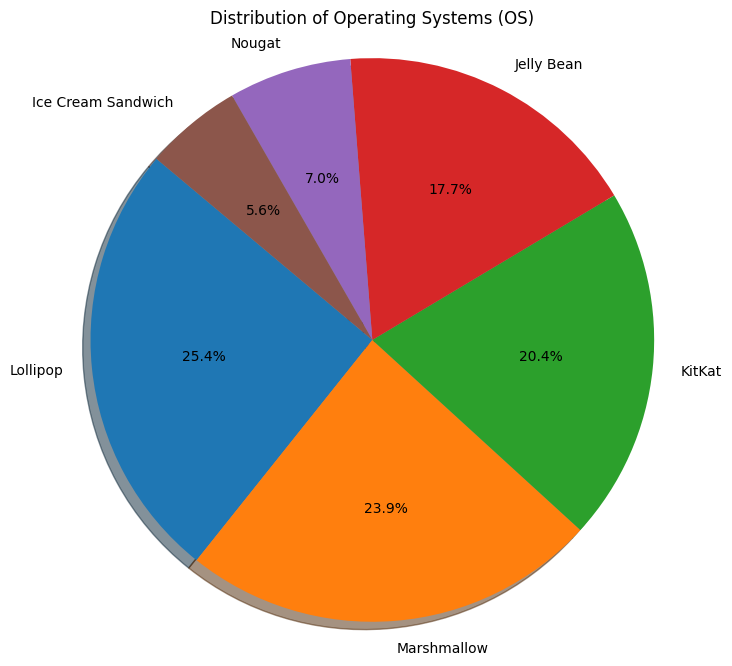

In [35]:
import matplotlib.pyplot as plt

# Create a pie chart for the 'OS' column
os_counts = df['OS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Operating Systems (OS)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


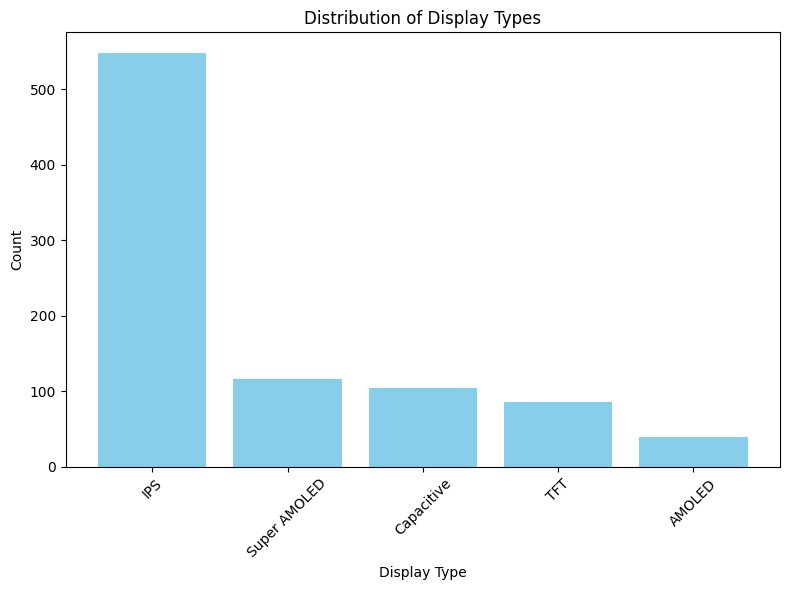

In [36]:
# Create a bar chart for the 'display_type' column
display_type_counts = df['display_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(display_type_counts.index, display_type_counts.values, color='skyblue')
plt.xlabel('Display Type')
plt.ylabel('Count')
plt.title('Distribution of Display Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
df.columns

Index(['weight_g', 'SIM', 'display_type', 'display_resolution',
       'display_size_ppi', 'OS', 'CPU', 'memory_card', 'internal_memory_GB',
       'RAM_GB', 'primary_camera', 'secondary_camera', 'battery',
       'approx_price_EUR'],
      dtype='object')

In [38]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in df.columns if df[col].dtype in ['object']]

In [39]:
cat_cols

['SIM', 'display_type', 'OS', 'CPU']

In [40]:
for col in cat_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()


Unique values in 'SIM':
['Dual' 'Sengle' 'Single']

Unique values in 'display_type':
['IPS' 'TFT' 'Capacitive' 'Super AMOLED' 'AMOLED']

Unique values in 'OS':
['Marshmallow' 'Lollipop' 'KitKat' 'Jelly Bean' 'Ice Cream Sandwich'
 'Nougat']

Unique values in 'CPU':
['Quad-core' 'Octa-core' 'Dual-core' 'Hexa-core']



In [41]:
df['SIM'] = df['SIM'].replace('Sengle', 'Single')


In [42]:
for col in cat_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'SIM':
['Dual' 'Single']

Unique values in 'display_type':
['IPS' 'TFT' 'Capacitive' 'Super AMOLED' 'AMOLED']

Unique values in 'OS':
['Marshmallow' 'Lollipop' 'KitKat' 'Jelly Bean' 'Ice Cream Sandwich'
 'Nougat']

Unique values in 'CPU':
['Quad-core' 'Octa-core' 'Dual-core' 'Hexa-core']



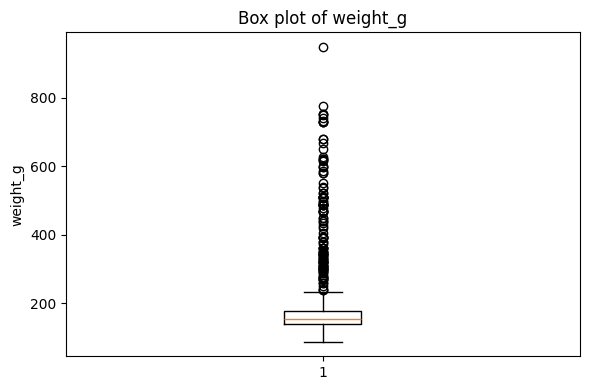

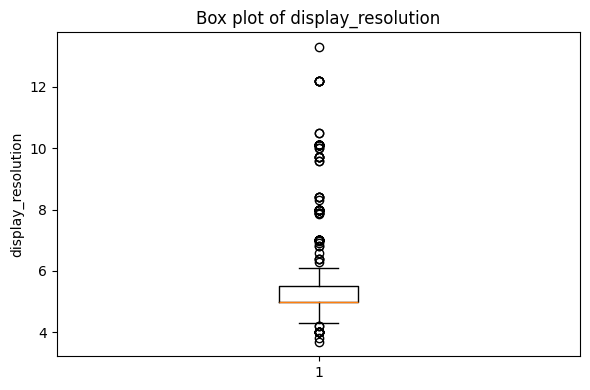

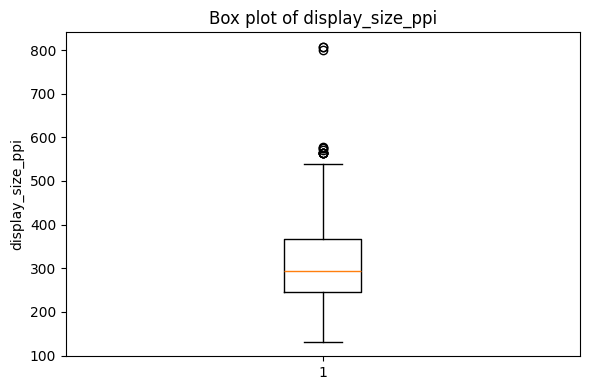

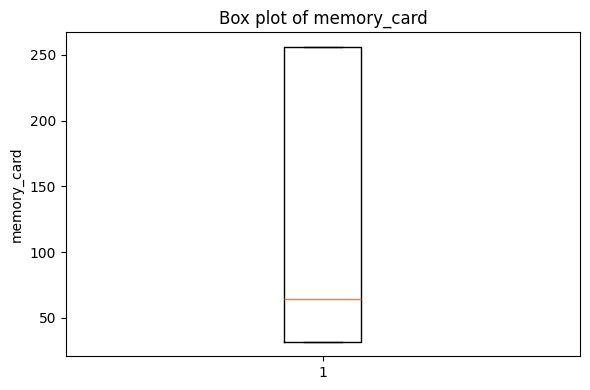

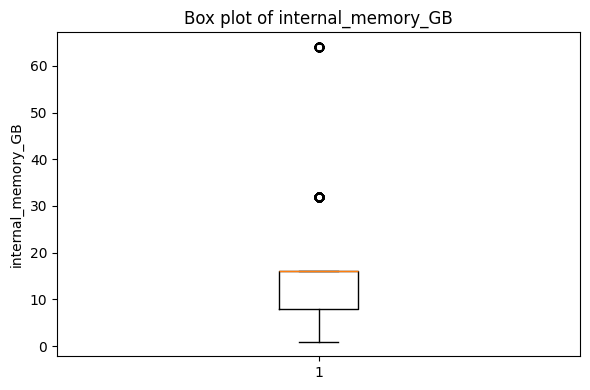

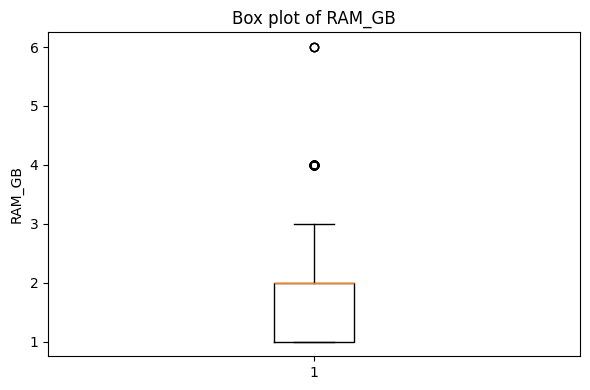

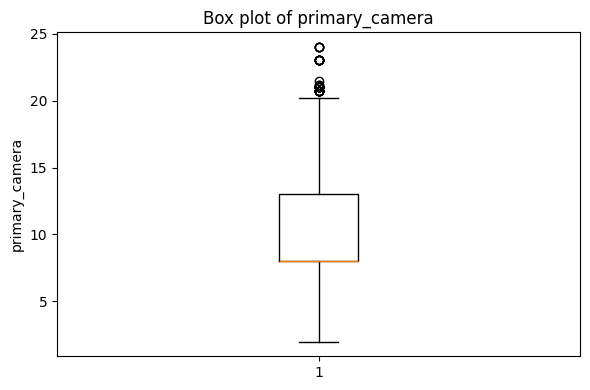

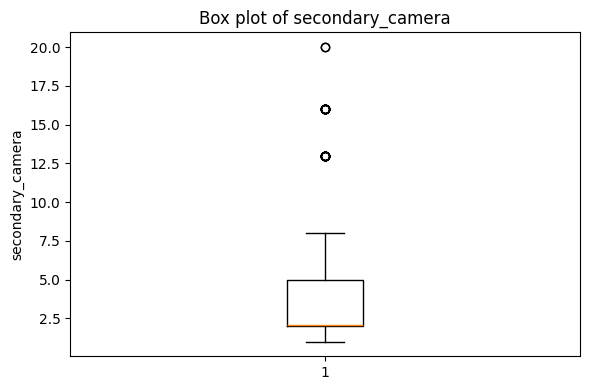

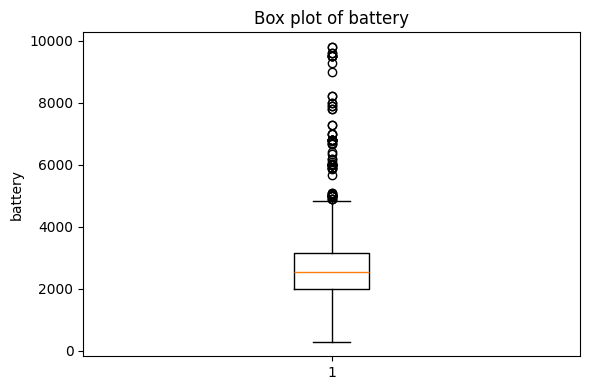

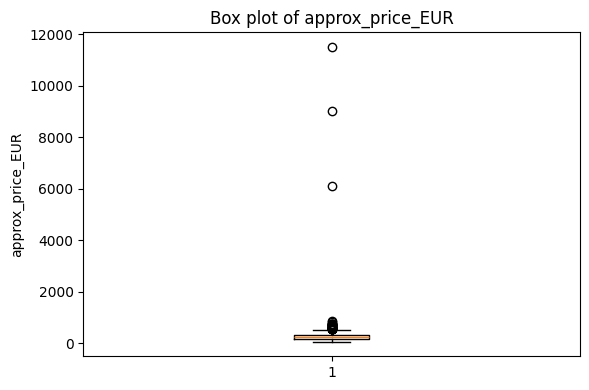

In [43]:
import matplotlib.pyplot as plt

# Loop through each numerical column and plot its boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [44]:
for col in num_cols:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Impute outliers with the median
    median = df[col].median()
    df.loc[outliers, col] = median


In [45]:
df

,weight_g,SIM,display_type,display_resolution,display_size_ppi,OS,CPU,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR
0,154.0,Dual,IPS,5.0,210,Marshmallow,Quad-core,128,16.0,2.0,13.0,2.0,3400.0,170
1,169.0,Dual,IPS,5.5,401,Marshmallow,Octa-core,256,16.0,3.0,13.0,5.0,4080.0,250
2,166.0,Single,IPS,5.5,267,Lollipop,Octa-core,32,16.0,3.0,13.0,2.1,4020.0,230
3,125.0,Dual,IPS,5.0,294,Marshmallow,Quad-core,32,8.0,1.0,8.0,5.0,2000.0,110
4,154.0,Single,IPS,5.0,283,Lollipop,Quad-core,256,16.0,2.0,5.0,2.0,4420.0,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,163.0,Dual,TFT,5.0,294,Jelly Bean,Quad-core,32,4.0,1.0,8.0,1.3,1600.0,200
890,189.0,Single,TFT,5.7,258,Jelly Bean,Quad-core,32,16.0,2.0,13.0,1.0,1200.0,340
891,110.0,Single,IPS,5.0,441,Jelly Bean,Quad-core,32,16.0,2.0,13.0,2.0,1730.0,430
892,110.0,Single,TFT,4.5,326,Ice Cream Sandwich,Quad-core,32,4.0,1.0,8.0,1.3,1600.0,380


In [46]:
df.isnull().sum()

weight_g              0
SIM                   0
display_type          0
display_resolution    0
display_size_ppi      0
OS                    0
CPU                   0
memory_card           0
internal_memory_GB    0
RAM_GB                0
primary_camera        0
secondary_camera      0
battery               0
approx_price_EUR      0
dtype: int64

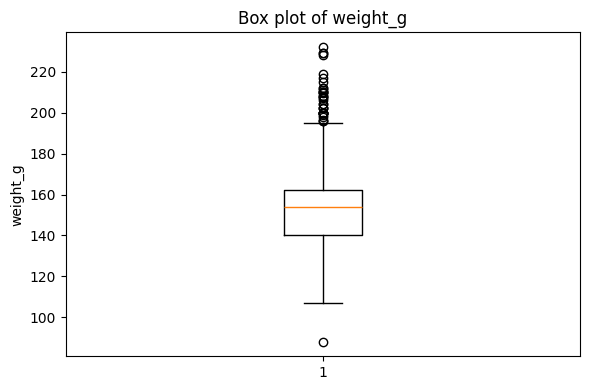

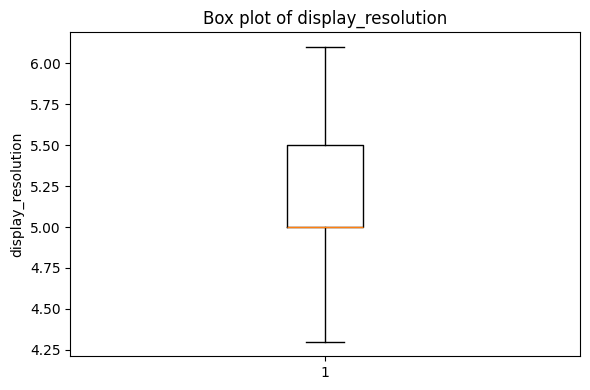

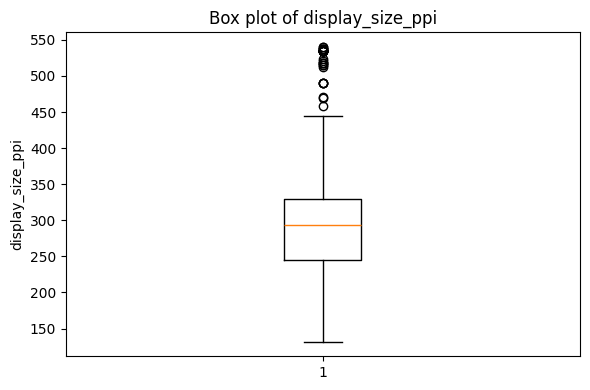

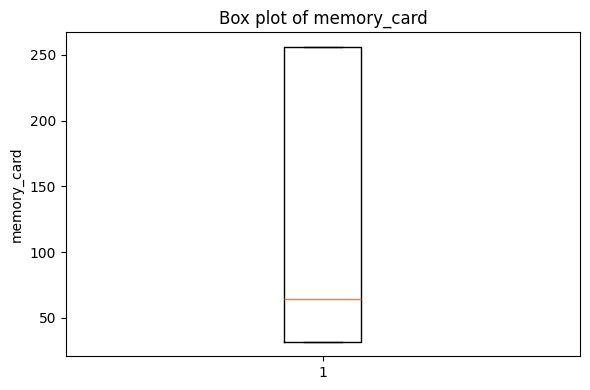

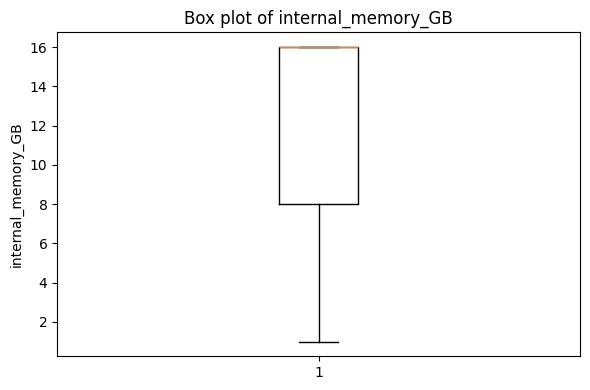

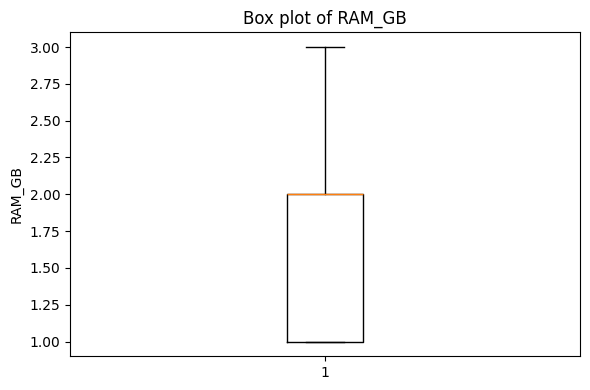

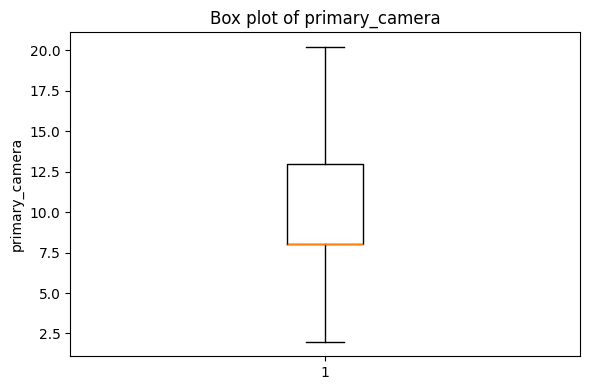

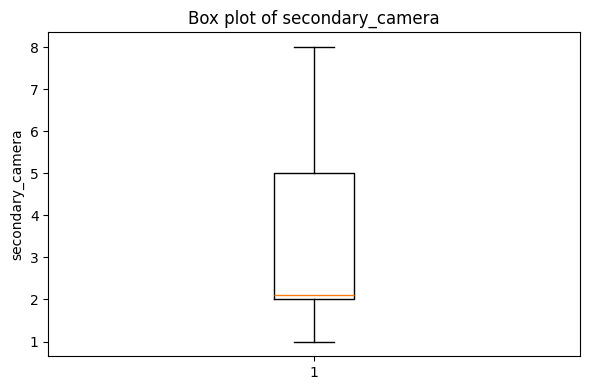

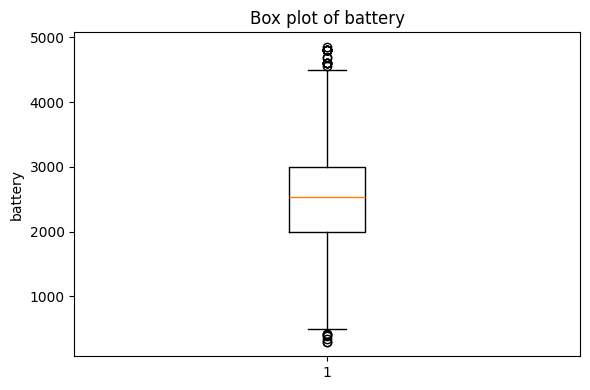

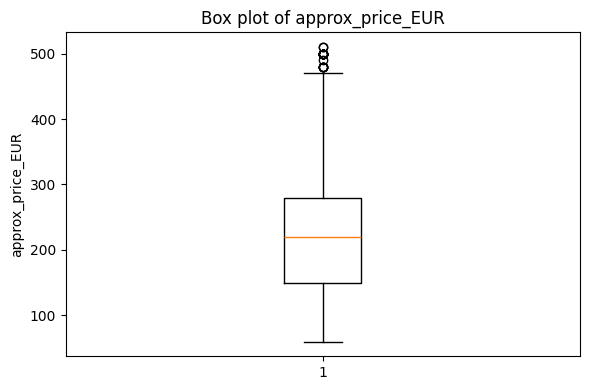

In [47]:
import matplotlib.pyplot as plt

# Loop through each numerical column and plot its boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [48]:
# Encoding categorical variables

cat_cols

['SIM', 'display_type', 'OS', 'CPU']

In [49]:
# Apply label encoding to categorical columns with the given mappings

sim_mapping = {'Dual': 1, 'Single': 0}
display_type_mapping = {'IPS': 2, 'TFT': 1, 'Capacitive': 0, 'Super AMOLED': 4, 'AMOLED': 3}
os_mapping = {'Marshmallow': 0, 'Lollipop': 1, 'KitKat': 2, 'Jelly Bean': 3, 'Ice Cream Sandwich': 4, 'Nougat': 5}
cpu_mapping = {'Quad-core': 1, 'Octa-core': 3, 'Dual-core': 0, 'Hexa-core': 2}

df['SIM'] = df['SIM'].map(sim_mapping)
df['display_type'] = df['display_type'].map(display_type_mapping)
df['OS'] = df['OS'].map(os_mapping)
df['CPU'] = df['CPU'].map(cpu_mapping)

df

,weight_g,SIM,display_type,display_resolution,display_size_ppi,OS,CPU,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery,approx_price_EUR
0,154.0,1,2,5.0,210,0,1,128,16.0,2.0,13.0,2.0,3400.0,170
1,169.0,1,2,5.5,401,0,3,256,16.0,3.0,13.0,5.0,4080.0,250
2,166.0,0,2,5.5,267,1,3,32,16.0,3.0,13.0,2.1,4020.0,230
3,125.0,1,2,5.0,294,0,1,32,8.0,1.0,8.0,5.0,2000.0,110
4,154.0,0,2,5.0,283,1,1,256,16.0,2.0,5.0,2.0,4420.0,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,163.0,1,1,5.0,294,3,1,32,4.0,1.0,8.0,1.3,1600.0,200
890,189.0,0,1,5.7,258,3,1,32,16.0,2.0,13.0,1.0,1200.0,340
891,110.0,0,2,5.0,441,3,1,32,16.0,2.0,13.0,2.0,1730.0,430
892,110.0,0,1,4.5,326,4,1,32,4.0,1.0,8.0,1.3,1600.0,380


In [50]:
# Define X and y where 'approx_price_EUR' is the target column
X = df.drop('approx_price_EUR', axis=1)
y = df['approx_price_EUR']


In [51]:
X

,weight_g,SIM,display_type,display_resolution,display_size_ppi,OS,CPU,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery
0,154.0,1,2,5.0,210,0,1,128,16.0,2.0,13.0,2.0,3400.0
1,169.0,1,2,5.5,401,0,3,256,16.0,3.0,13.0,5.0,4080.0
2,166.0,0,2,5.5,267,1,3,32,16.0,3.0,13.0,2.1,4020.0
3,125.0,1,2,5.0,294,0,1,32,8.0,1.0,8.0,5.0,2000.0
4,154.0,0,2,5.0,283,1,1,256,16.0,2.0,5.0,2.0,4420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,163.0,1,1,5.0,294,3,1,32,4.0,1.0,8.0,1.3,1600.0
890,189.0,0,1,5.7,258,3,1,32,16.0,2.0,13.0,1.0,1200.0
891,110.0,0,2,5.0,441,3,1,32,16.0,2.0,13.0,2.0,1730.0
892,110.0,0,1,4.5,326,4,1,32,4.0,1.0,8.0,1.3,1600.0


In [52]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the feature matrix X and transform X
X_scaled = scaler.fit_transform(X)

# If you want X as a DataFrame with original column names:
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()




,weight_g,SIM,display_type,display_resolution,display_size_ppi,OS,CPU,memory_card,internal_memory_GB,RAM_GB,primary_camera,secondary_camera,battery
0,0.064125,0.871689,0.026332,-0.210098,-1.077195,-1.193724,-0.436386,0.065666,0.741317,0.359508,0.924370,-0.715924,1.040627
1,0.804666,0.871689,0.026332,1.089388,1.179431,-1.193724,1.504553,1.314718,0.741317,1.753867,0.924370,0.710181,1.875533
2,0.656558,-1.147198,0.026332,1.089388,-0.403751,-0.518288,1.504553,-0.871123,0.741317,1.753867,0.924370,-0.668387,1.801865
3,-1.367587,0.871689,0.026332,-0.210098,-0.084752,-1.193724,-0.436386,-0.871123,-1.056546,-1.034852,-0.487847,0.710181,-0.678298
4,0.064125,-1.147198,0.026332,-0.210098,-0.214715,-0.518288,-0.436386,1.314718,0.741317,0.359508,-1.335177,-0.715924,2.292986


In [53]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import SGDRegressor

# Set the number of epochs (max_iter) and learning rate (eta0)
linreg = SGDRegressor(max_iter=5000, learning_rate='constant', eta0=0.00001, random_state=42)

# Train the linear regression model
linreg.fit(X_train, y_train)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,5000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [64]:
# Show the result of the model

# Predict on the test set
y_pred = linreg.predict(X_test)

# Import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R2 score
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Optionally display a few predicted vs actual
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())


Root Mean Squared Error (RMSE): 5893.04
R^2 Score: 0.3302
   Actual   Predicted
0     460  272.030563
1     150  183.379960
2     160  170.687289
3     260  209.589434
4     280  207.968481


In [65]:
import joblib

# Save the trained linear regression model to a file
joblib.dump(linreg, 'sgd_regressor_model.pkl')


['sgd_regressor_model.pkl']